In [343]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [344]:
df = pd.read_csv(r"C:\Users\Aadiluddin\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [345]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [346]:
df.shape

(7043, 21)

In [347]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [349]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") 
df["TotalCharges"].fillna(0, inplace=True)

In [350]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [351]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [352]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") 
df["TotalCharges"].fillna(0, inplace=True) 

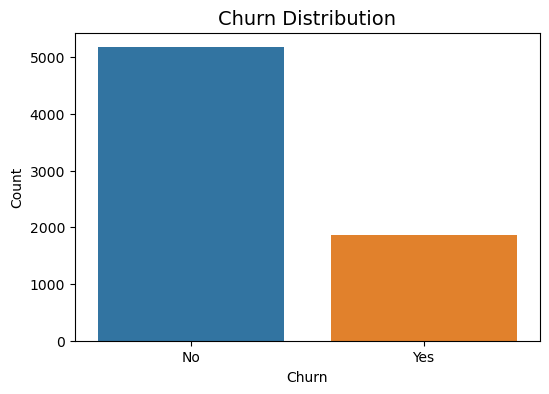

In [353]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Churn", data=df, palette=["#1f77b4", "#ff7f0e"])
plt.title("Churn Distribution", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

C:\Users\Aadiluddin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


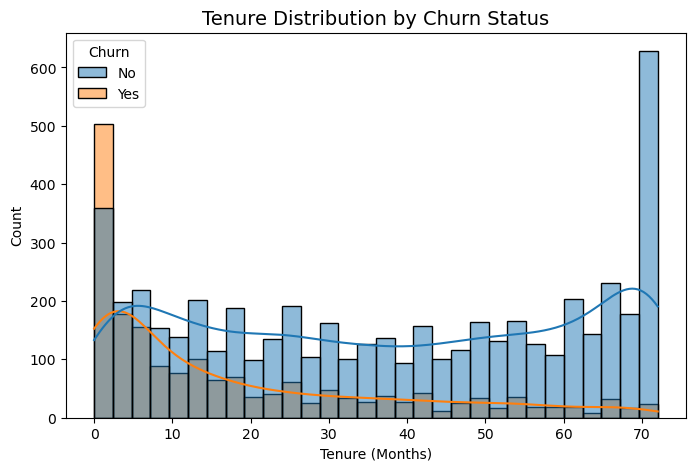

In [354]:
plt.figure(figsize=(8, 5))
sns.histplot(df, x="tenure", hue="Churn", bins=30, kde=True, palette=["#1f77b4", "#ff7f0e"])
plt.title("Tenure Distribution by Churn Status", fontsize=14)
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

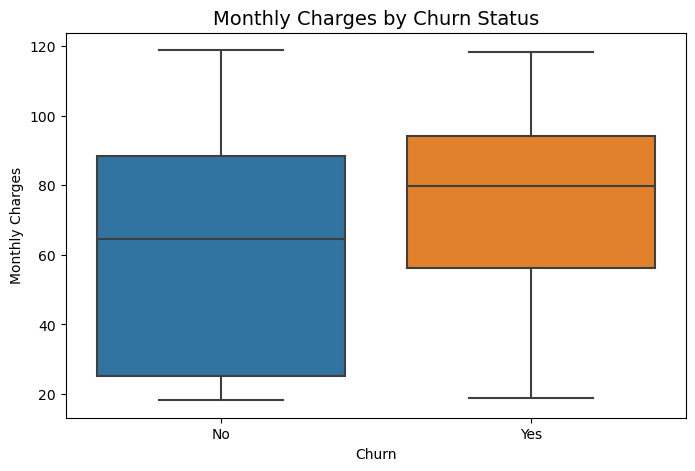

In [355]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette=["#1f77b4", "#ff7f0e"])
plt.title("Monthly Charges by Churn Status", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

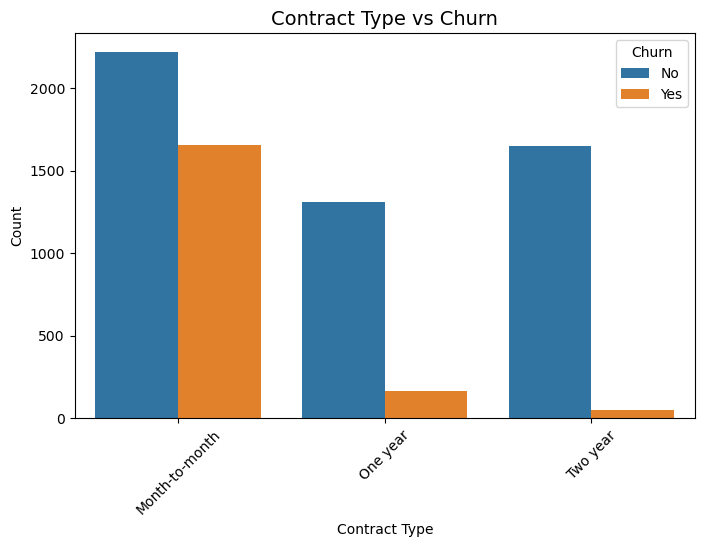

In [356]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Contract", hue="Churn", data=df, palette=["#1f77b4", "#ff7f0e"])
plt.title("Contract Type vs Churn", fontsize=14)
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

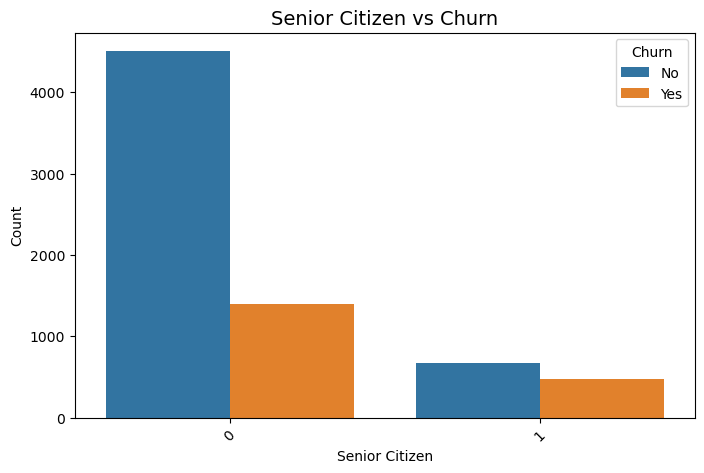

In [357]:
plt.figure(figsize=(8, 5))
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Senior Citizen vs Churn", fontsize=14)
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


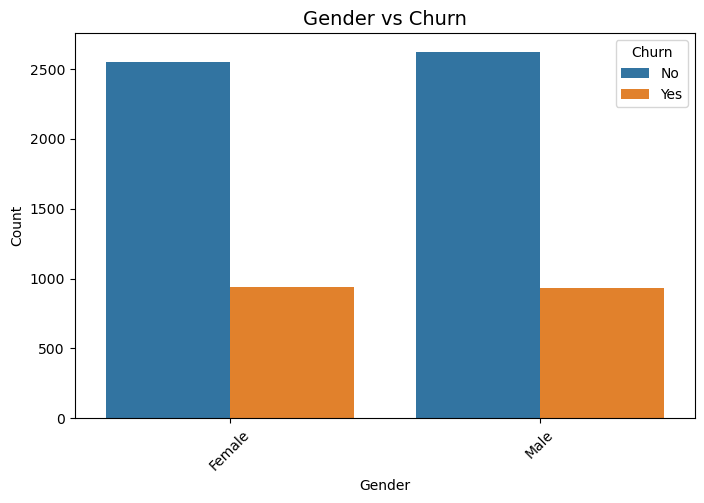

In [358]:
plt.figure(figsize=(8, 5))
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Gender vs Churn", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

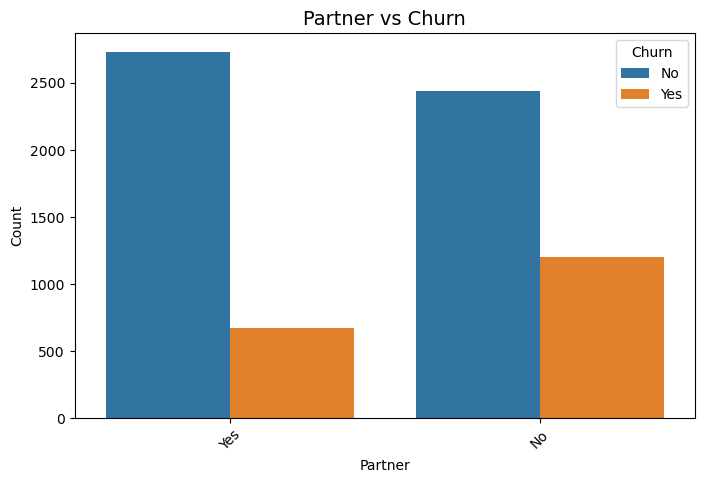

In [359]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Partner", hue="Churn", data=df)
plt.title("Partner vs Churn", fontsize=14)
plt.xlabel("Partner")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

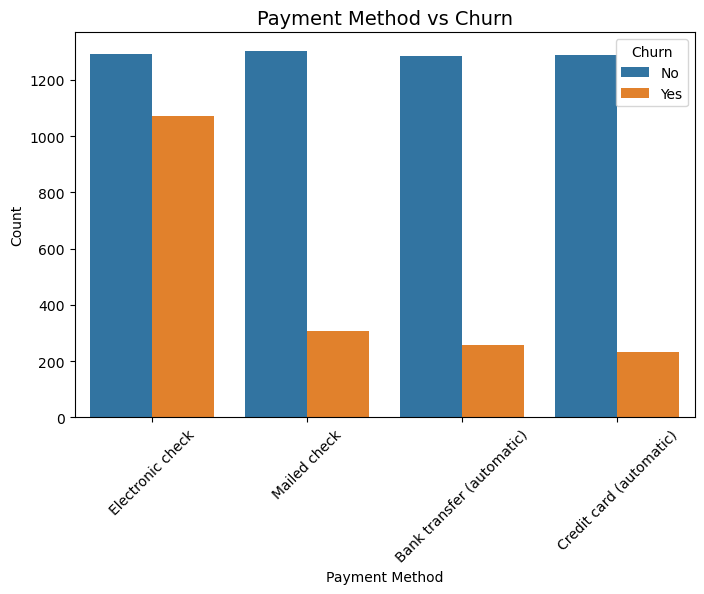

In [360]:
plt.figure(figsize=(8, 5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Payment Method vs Churn", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

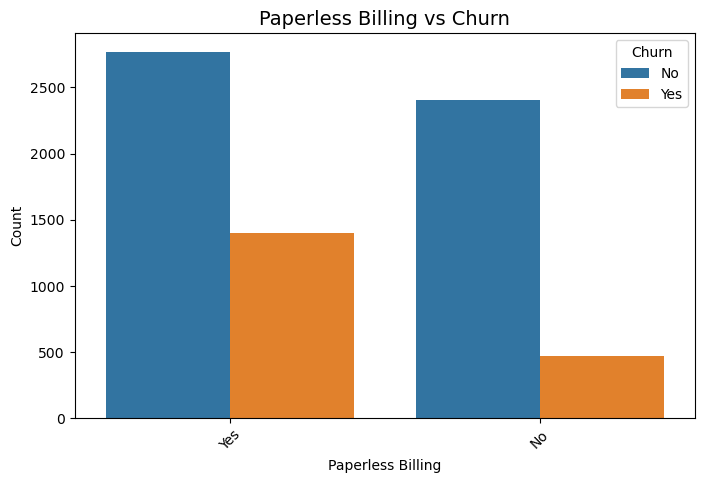

In [361]:
plt.figure(figsize=(8, 5))
sns.countplot(x="PaperlessBilling", hue="Churn", data=df)
plt.title("Paperless Billing vs Churn", fontsize=14)
plt.xlabel("Paperless Billing")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

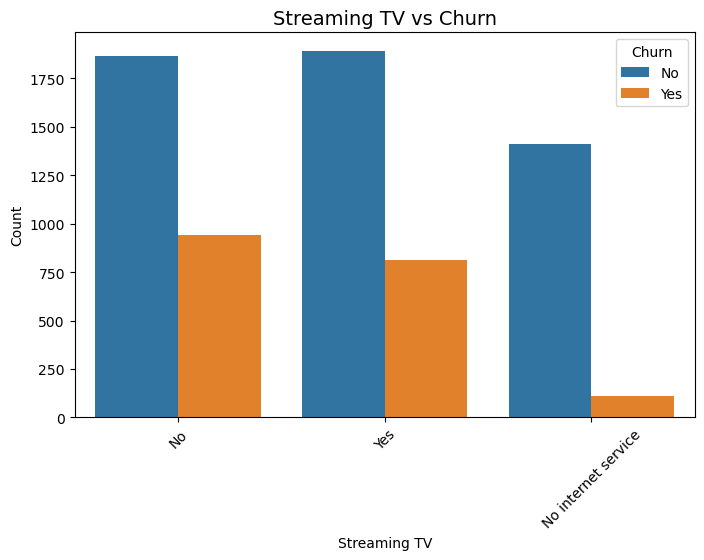

In [362]:
plt.figure(figsize=(8, 5))
sns.countplot(x="StreamingTV", hue="Churn", data=df)
plt.title("Streaming TV vs Churn", fontsize=14)
plt.xlabel("Streaming TV")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

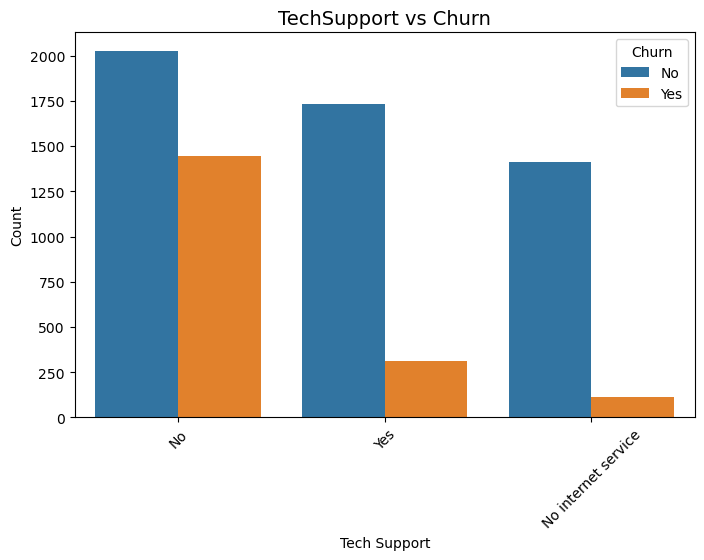

In [363]:
plt.figure(figsize=(8, 5))
sns.countplot(x="TechSupport", hue="Churn", data=df)
plt.title("TechSupport vs Churn", fontsize=14)
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

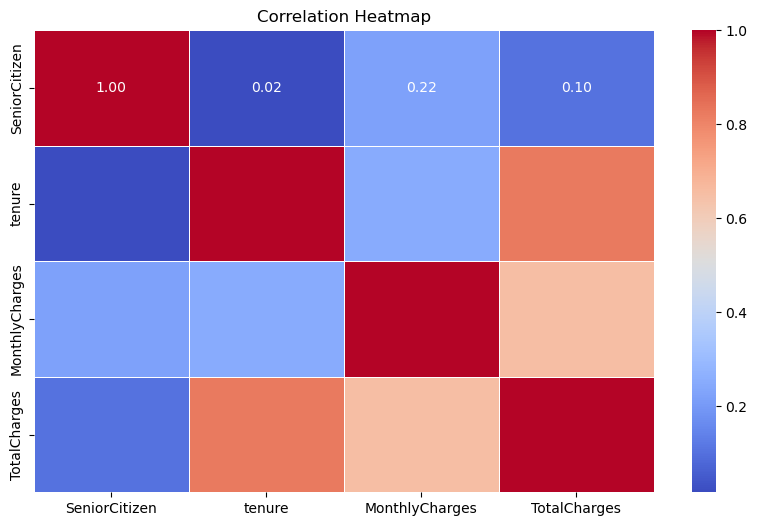

In [364]:
numeric_df = df.select_dtypes(include=["number"])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [365]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [366]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
                    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
                    "PaperlessBilling", "PaymentMethod", "Churn"]

# Apply Label Encoding

for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [367]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [368]:
df["HasInternet"] = df["InternetService"].apply(lambda x: 0 if x == "No" else 1)

In [369]:
service_cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", 
                "TechSupport", "StreamingTV", "StreamingMovies"]

df["TotalServices"] = df[service_cols].apply(lambda x: sum(x == "Yes"), axis=1)

In [370]:
df["TenureGroup"] = pd.cut(df["tenure"], bins=[0, 12, 24, 48, 72], 
                           labels=["0-1 Year", "1-2 Years", "2-4 Years", "4-6 Years"])

In [371]:
df["TenureGroup"].fillna(df["TenureGroup"].mode()[0], inplace=True)

In [372]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'HasInternet', 'TotalServices', 'TenureGroup'],
      dtype='object')

In [373]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["TenureGroup"] = le.fit_transform(df["TenureGroup"])  # Assuming "tenure_group" is the column name

In [374]:
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0                0         0                 1              2          

In [375]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
HasInternet         0
TotalServices       0
TenureGroup         0
dtype: int64


In [376]:
df["Churn"].value_counts(normalize=True) * 100


Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

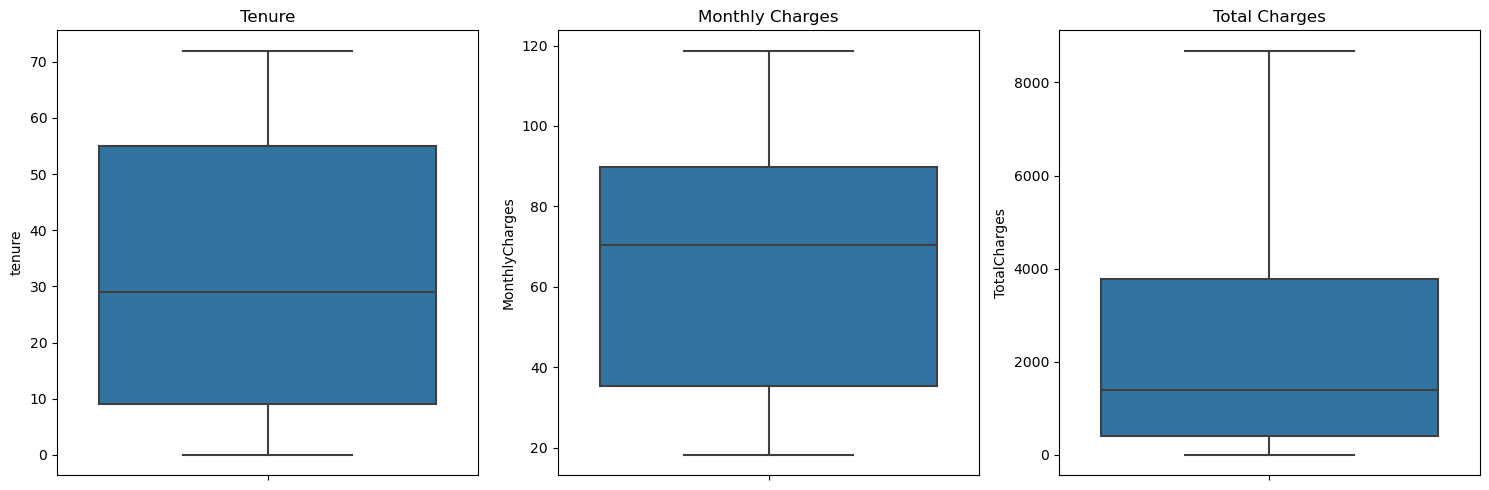

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating separate boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df["tenure"], ax=axes[0])
axes[0].set_title("Tenure")

sns.boxplot(y=df["MonthlyCharges"], ax=axes[1])
axes[1].set_title("Monthly Charges")

sns.boxplot(y=df["TotalCharges"], ax=axes[2])
axes[2].set_title("Total Charges")

plt.tight_layout()
plt.show()

In [378]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(df[["MonthlyCharges", "TotalCharges"]])

In [397]:
df = df.drop(columns=['customerID'])

In [396]:
print(X_train.dtypes)
print(X_test.dtypes)

customerID            int32
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
HasInternet           int64
TotalServices         int64
TenureGroup           int32
dtype: object
customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSu

In [401]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1036
           1       0.53      0.83      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



C:\Users\Aadiluddin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [402]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predicted values
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.63      0.44      0.52       373

    accuracy                           0.78      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409

[[941  95]
 [209 164]]
ROC-AUC Score: 0.8340518802985291


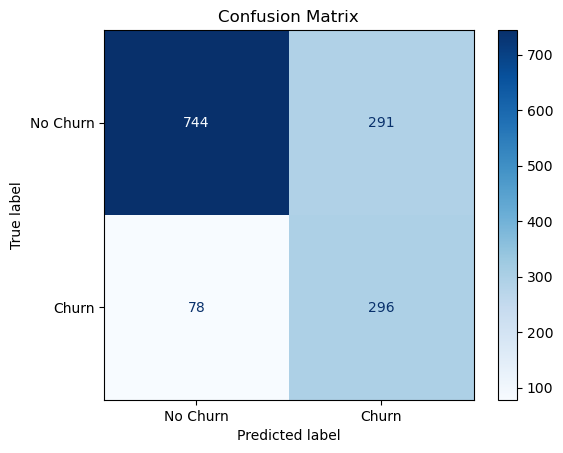

In [394]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [391]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [392]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=500)  # or 'saga'
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

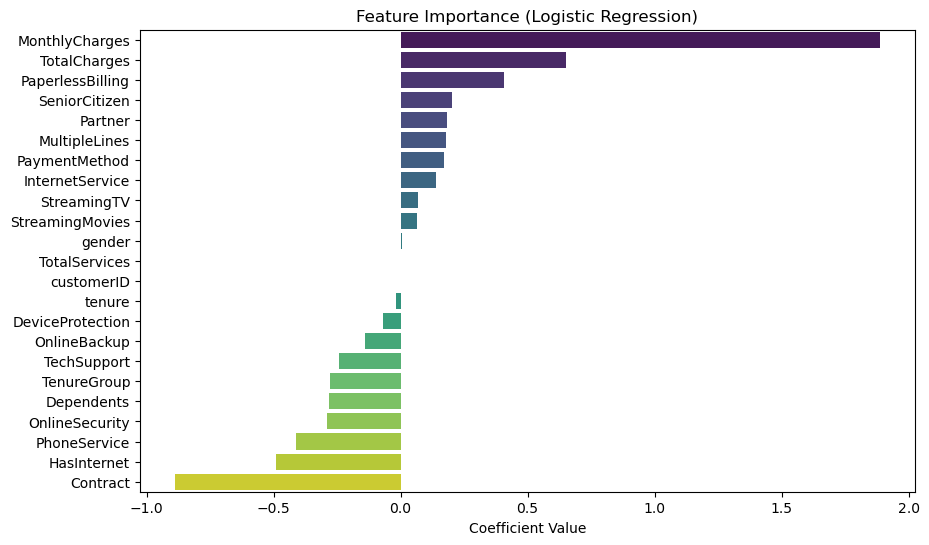

In [393]:
import pandas as pd
import seaborn as sns

importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=importance.index, palette="viridis")
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.show()


C:\Users\Aadiluddin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


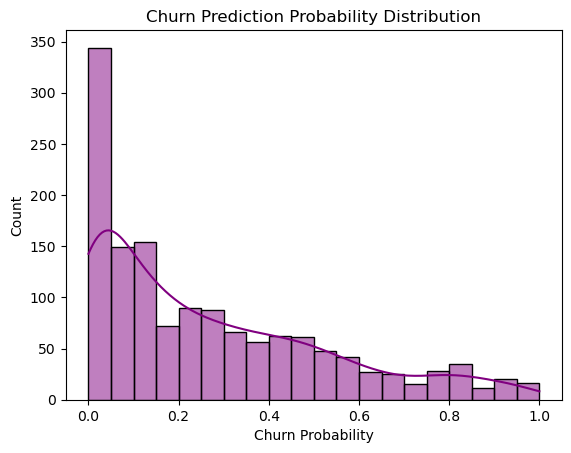

In [403]:
import numpy as np
sns.histplot(model.predict_proba(X_test)[:, 1], bins=20, kde=True, color="purple")
plt.title("Churn Prediction Probability Distribution")
plt.xlabel("Churn Probability")
plt.ylabel("Count")
plt.show()